In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def print_results(file):
    df = pd.read_csv(file)
    other_count = 140
    asserted_count = 356
    total = other_count + asserted_count
    df['Discovered Macro Avg F1'] = (df['eval/discovered_asserted_f1']+df['eval/discovered_other_f1'])/2
    df['Discovered Macro Avg P'] = (df['eval/discovered_asserted_precision']+df['eval/discovered_other_precision'])/2
    df['Discovered Macro Avg R'] = (df['eval/discovered_asserted_recall']+df['eval/discovered_other_recall'])/2
    df['Discovered Weighted Avg F1'] = (asserted_count/total)*df['eval/discovered_asserted_f1']+(other_count/total)*df['eval/discovered_other_f1']
    df['Discovered Weighted Avg P'] = ((asserted_count/total)*df['eval/discovered_asserted_precision']+(other_count/total)*df['eval/discovered_other_precision'])
    df['Discovered Weighted Avg R'] = ((asserted_count/total)*df['eval/discovered_asserted_recall']+(other_count/total)*df['eval/discovered_other_recall'])
    df['All Macro Avg F1'] = (df['eval/asserted_f1']+df['eval/other_f1'])/2
    df['All Macro Avg P'] = (df['eval/asserted_precision']+df['eval/other_precision'])/2
    df['All Macro Avg R'] = (df['eval/asserted_recall']+df['eval/other_recall'])/2
    df['All Weighted Avg F1'] = (asserted_count/total)*df['eval/asserted_f1']+(other_count/total)*df['eval/other_f1']
    df['All Weighted Avg P'] = ((asserted_count/total)*df['eval/asserted_precision']+(other_count/total)*df['eval/other_precision'])
    df['All Weighted Avg R'] = ((asserted_count/total)*df['eval/asserted_recall']+(other_count/total)*df['eval/other_recall'])
    cols = ['eval/discovered_asserted_f1',	
            'eval/discovered_asserted_precision',	
            'eval/discovered_asserted_recall',	
            'eval/discovered_other_f1',	
            'eval/discovered_other_precision',	
            'eval/discovered_other_recall',	
            'eval/trigger_f1',	
            'eval/trigger_precision',	
            'eval/trigger_recall',	
            'eval/other_f1',	
            'eval/other_precision',	
            'eval/other_recall',	
            'eval/asserted_f1',	
            'eval/asserted_precision',	
            'eval/asserted_recall', 
            'Discovered Weighted Avg F1', 
            'Discovered Weighted Avg P', 
            'Discovered Weighted Avg R', 
            'Discovered Macro Avg F1', 
            'Discovered Macro Avg P', 
            'Discovered Macro Avg R',
            'All Weighted Avg F1', 
            'All Weighted Avg P', 
            'All Weighted Avg R', 
            'All Macro Avg F1', 
            'All Macro Avg P', 
            'All Macro Avg R']
    res = df.describe()[cols].T
    res['res'] = res.apply(lambda x: "$" + str(np.round(x['mean']*100, 1)) + "^{\\pm" + str(np.round(x['std']*100, 1)) + "}$", axis=1)
    discovered_asserted_cols = ['eval/discovered_asserted_precision', 'eval/discovered_asserted_recall', 'eval/discovered_asserted_f1']
    discovered_other_cols = ['eval/discovered_other_precision', 'eval/discovered_other_recall', 'eval/discovered_other_f1']
    discovered_weight_cols = ['Discovered Weighted Avg P', 'Discovered Weighted Avg R', 'Discovered Weighted Avg F1']
    discovered_macro_cols = ['Discovered Macro Avg P', 'Discovered Macro Avg R', 'Discovered Macro Avg F1']
    
    other_cols = ['eval/other_precision', 'eval/other_recall', 'eval/other_f1']
    asserted_cols = ['eval/asserted_precision', 'eval/asserted_recall', 'eval/asserted_f1']
    all_weight_cols = ['All Weighted Avg P', 'All Weighted Avg R', 'All Weighted Avg F1']
    all_macro_cols = ['All Macro Avg P', 'All Macro Avg R', 'All Macro Avg F1']
    trigger_cols = ['eval/trigger_precision', 'eval/trigger_recall', 'eval/trigger_f1']
    
    res = pd.DataFrame(res['res']).T
    discovered_asserted = res[discovered_asserted_cols]
    discovered_other = res[discovered_other_cols]
    discovered_weight = res[discovered_weight_cols]
    discovered_macro = res[discovered_macro_cols]
    
    asserted = res[asserted_cols]
    other = res[other_cols]
    all_weight = res[all_weight_cols]
    all_macro = res[all_macro_cols]
    trigger = res[trigger_cols]
    
    def rename_dict(lst):
        x = {}
        x[lst[0]] = 'P'
        x[lst[1]] = 'R'
        x[lst[2]] = 'F1'
        return x
        
    discovered_asserted = discovered_asserted.rename(rename_dict(discovered_asserted_cols), axis=1)
    discovered_other = discovered_other.rename(rename_dict(discovered_other_cols), axis=1)
    discovered_weight = discovered_weight.rename(rename_dict(discovered_weight_cols), axis=1)
    discovered_macro = discovered_macro.rename(rename_dict(discovered_macro_cols), axis=1)
    
    other = other.rename(rename_dict(other_cols), axis=1)
    asserted = asserted.rename(rename_dict(asserted_cols), axis=1)
    all_weight = all_weight.rename(rename_dict(all_weight_cols), axis=1)
    all_macro = all_macro.rename(rename_dict(all_macro_cols), axis=1)
    trigger = trigger.rename(rename_dict(trigger_cols), axis=1)
    discovered_asserted = discovered_asserted.rename({'res': 'Discovered Asserted'})
    discovered_other = discovered_other.rename({'res': 'Discovered Other'})
    discovered_macro = discovered_macro.rename({'res': 'Discovered Macro Avg'})
    discovered_weight = discovered_weight.rename({'res': 'Discovered Weighted Avg'})
    
    asserted = asserted.rename({'res': 'Asserted'})
    other = other.rename({'res': 'Other'})
    all_macro = all_macro.rename({'res': 'All Macro Avg'})
    all_weight = all_weight.rename({'res': 'All Weighted Avg'})
    trigger = trigger.rename({'res': 'Trigger'})
    discovered = pd.concat([discovered_asserted, discovered_other, discovered_macro, discovered_weight])
    
    
    discovered = pd.concat([discovered_asserted, discovered_other, discovered_macro, discovered_weight])
    discovered = pd.concat([discovered_asserted, discovered_other, discovered_macro, discovered_weight])

    asserted = asserted.reset_index(drop=True)
    other = other.reset_index(drop=True)

    asserted.columns = pd.MultiIndex.from_product([['Asserted'], asserted.columns])
    other.columns = pd.MultiIndex.from_product([['Other'], other.columns])
    
    # Concatenate side by side
    all_df = pd.concat([asserted, other], axis=1)

    # (Optional) reorder
    all_df = all_df[['Asserted', 'Other']]  # just to enforce grouping

    discovered_asserted = discovered_asserted.reset_index(drop=True)
    discovered_other = discovered_other.reset_index(drop=True)

    discovered_asserted.columns = pd.MultiIndex.from_product([['Asserted'], discovered_asserted.columns])
    discovered_other.columns = pd.MultiIndex.from_product([['Other'], discovered_other.columns])
    
    # Concatenate side by side
    discovered_df = pd.concat([discovered_asserted, discovered_other], axis=1)

    # (Optional) reorder
    discovered_df = discovered_df[['Asserted', 'Other']]  # just to enforce grouping


    print("Discovered")
    print(discovered_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
    print("All")
    print(all_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
    print("Trigger")
    print(trigger.to_latex(index=False, escape=False))
    return df

In [4]:
pipeline = print_results("../results/end_to_end_results/pipeline_results.csv")

Discovered
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $92.5^{\pm0.6}$ &  $82.3^{\pm3.0}$ &  $87.1^{\pm1.6}$ &  $62.6^{\pm4.1}$ &  $81.5^{\pm2.0}$ &  $70.7^{\pm2.4}$ \\
\bottomrule
\end{tabular}

All
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $66.1^{\pm2.2}$ &  $62.5^{\pm2.6}$ &  $64.2^{\pm1.6}$ &  $37.3^{\pm1.3}$ &  $41.1^{\pm3.0}$ &  $39.0^{\pm1.2}$ \\
\bottomrule
\end{tabular}

Trigger
\begin{tabular}{lll}
\toprule
              P &               R &              F1 \\
\midrule
$75.7^{\pm5.3}$ & $84.4^{\pm1.6}$ & $79.7^{\pm2.7}$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_53435/1515110169.py:129: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(discovered_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:131: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:133: FutureWarning: In future versions `DataFrame.to_latex` is expected to

In [5]:
eventgraph = print_results("../results/end_to_end_results/eventgraph_results.csv")

Discovered
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $90.4^{\pm3.1}$ &  $93.2^{\pm0.9}$ &  $91.8^{\pm1.9}$ &  $79.4^{\pm4.5}$ &  $72.8^{\pm9.5}$ &  $75.9^{\pm7.1}$ \\
\bottomrule
\end{tabular}

All
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $33.3^{\pm1.3}$ &  $37.8^{\pm5.3}$ &  $35.3^{\pm3.1}$ &  $14.8^{\pm1.9}$ &  $12.5^{\pm1.3}$ &  $13.5^{\pm1.2}$ \\
\bottomrule
\end{tabular}

Trigger
\begin{tabular}{lll}
\toprule
              P &               R &              F1 \\
\midrule
$44.5^{\pm0.8}$ & $47.8^{\pm8.1}$ & $45.8^{\pm3.8}$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_53435/1515110169.py:129: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(discovered_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:131: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:133: FutureWarning: In future versions `DataFrame.to_latex` is expected to

In [10]:
text2fact = print_results("../results/end_to_end_results/text2fact_results.csv")

Discovered
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $86.4^{\pm1.0}$ &  $91.1^{\pm1.7}$ &  $88.7^{\pm0.7}$ &  $73.9^{\pm3.0}$ &  $63.5^{\pm3.1}$ &  $68.2^{\pm1.3}$ \\
\bottomrule
\end{tabular}

All
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $76.6^{\pm1.6}$ &  $53.7^{\pm2.5}$ &  $63.1^{\pm2.0}$ &  $58.3^{\pm3.6}$ &  $37.3^{\pm2.3}$ &  $45.4^{\pm2.0}$ \\
\bottomrule
\end{tabular}

Trigger
\begin{tabular}{lll}
\toprule
              P &               R &              F1 \\
\midrule
$86.0^{\pm1.1}$ & $58.9^{\pm2.0}$ & $69.9^{\pm1.8}$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_14720/1515110169.py:129: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(discovered_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_14720/1515110169.py:131: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_14720/1515110169.py:133: FutureWarning: In future versions `DataFrame.to_latex` is expected to

In [8]:
bio_fact = print_results("../results/end_to_end_results/bio_fact_results.csv")

Discovered
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $87.1^{\pm1.6}$ &  $91.7^{\pm2.6}$ &  $89.3^{\pm0.6}$ &  $73.0^{\pm4.8}$ &  $61.4^{\pm6.5}$ &  $66.3^{\pm2.6}$ \\
\bottomrule
\end{tabular}

All
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $71.2^{\pm3.1}$ &  $73.1^{\pm3.9}$ &  $72.0^{\pm0.9}$ &  $56.0^{\pm7.0}$ &  $44.4^{\pm8.3}$ &  $48.7^{\pm3.1}$ \\
\bottomrule
\end{tabular}

Trigger
\begin{tabular}{lll}
\toprule
              P &               R &              F1 \\
\midrule
$80.5^{\pm4.5}$ & $77.6^{\pm5.7}$ & $78.8^{\pm1.3}$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_14720/1515110169.py:129: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(discovered_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_14720/1515110169.py:131: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_14720/1515110169.py:133: FutureWarning: In future versions `DataFrame.to_latex` is expected to

In [7]:
print_results("../results/end_to_end_results/test_pipeline_results.csv")
print_results("../results/end_to_end_results/test_bio_fact_results.csv")
print("EVENTGRAPH")
print_results("../results/end_to_end_results/test_eventgraph_results.csv")
print("EVENTGRAPH")
print_results("../results/end_to_end_results/test_text2fact_results.csv")

Discovered
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $94.8^{\pm1.7}$ &  $85.5^{\pm4.3}$ &  $89.8^{\pm1.9}$ &  $68.5^{\pm5.1}$ &  $86.7^{\pm4.9}$ &  $76.3^{\pm2.2}$ \\
\bottomrule
\end{tabular}

All
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $61.7^{\pm2.5}$ &  $63.7^{\pm3.6}$ &  $62.6^{\pm1.9}$ &  $38.8^{\pm1.7}$ &  $36.9^{\pm3.6}$ &  $37.7^{\pm1.4}$ \\
\bottomrule
\end{tabular}

Trigger
\begin{tabular}{lll}
\toprule
              P &               R &              F1 \\
\midrule
$71.3^{\pm4.4}$ & $83.5^{\pm1.7}$ & $76.8^{\pm2.1}$ \\
\bottomrule
\end{tabular}

Discovered
\begin{tabular}{lllllll}

/tmp/ipykernel_53435/1515110169.py:129: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(discovered_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:131: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:133: FutureWarning: In future versions `DataFrame.to_latex` is expected to

Discovered
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $86.4^{\pm0.9}$ &  $95.1^{\pm1.2}$ &  $90.5^{\pm0.1}$ &  $78.3^{\pm3.8}$ &  $53.9^{\pm5.6}$ &  $63.6^{\pm3.9}$ \\
\bottomrule
\end{tabular}

All
\begin{tabular}{lllllll}
\toprule
{} & \multicolumn{3}{c}{Asserted} & \multicolumn{3}{c}{Other} \\
{} &                P &                R &               F1 &                P &                R &               F1 \\
\midrule
\textbf{0} &  $73.4^{\pm1.4}$ &  $58.0^{\pm1.2}$ &  $64.8^{\pm0.5}$ &  $69.1^{\pm3.7}$ &  $28.7^{\pm4.8}$ &  $40.3^{\pm4.6}$ \\
\bottomrule
\end{tabular}

Trigger
\begin{tabular}{lll}
\toprule
              P &               R &              F1 \\
\midrule
$85.5^{\pm0.6}$ & $58.8^{\pm0.7}$ & $69.7^{\pm0.7}$ \\
\bottomrule
\end{tabular}



/tmp/ipykernel_53435/1515110169.py:129: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(discovered_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:131: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_df.to_latex(multicolumn=True, multicolumn_format='c', bold_rows=True, escape=False))
/tmp/ipykernel_53435/1515110169.py:133: FutureWarning: In future versions `DataFrame.to_latex` is expected to

,Name,Created,Runtime,State,model,epochs,train/learning_rate,eval/discovered_asserted_f1,eval/discovered_asserted_precision,eval/discovered_asserted_recall,...,Discovered Macro Avg R,Discovered Weighted Avg F1,Discovered Weighted Avg P,Discovered Weighted Avg R,All Macro Avg F1,All Macro Avg P,All Macro Avg R,All Weighted Avg F1,All Weighted Avg P,All Weighted Avg R
0,test-text2factuality-exp,2025-04-08T08:33:19.000Z,6486,failed,google/flan-t5-large,15,0.00005,0.903896,0.865672,0.945652,...,0.774297,0.843261,0.848242,0.848919,0.555319,0.719252,0.459192,0.593096,0.729851,0.505241
1,test-text2factuality-exp,2025-04-08T06:52:25.000Z,5941,crashed,google/flan-t5-large,15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,test-text2factuality-exp,2025-04-07T18:54:25.000Z,6508,failed,google/flan-t5-large,15,0.00005,0.905000,0.866029,0.947644,...,0.744314,0.828682,0.838202,0.832861,0.528525,0.713138,0.436073,0.583434,0.724303,0.502087
3,test-text2factuality-exp,2025-04-07T12:16:27.000Z,7733,failed,google/flan-t5-large,15,0.00005,0.905473,0.850467,0.968085,...,0.717376,0.818049,0.842864,0.826556,0.505086,0.725284,0.416144,0.566686,0.720250,0.492251
4,test-text2factuality-exp,2025-04-07T08:48:34.000Z,7711,finished,google/flan-t5-large,15,0.00005,0.905852,0.872549,0.941799,...,0.742829,0.826936,0.834598,0.829477,0.513842,0.693750,0.422582,0.572978,0.714617,0.490230


In [8]:
def create_metric_dists(df, name):
    sns.set_theme(rc={'figure.figsize':(11.7, 10.27)})
    
    f, axes = plt.subplots(2, 2)
    sns.kdeplot(data=df, x="eval/trigger_f1", ax=axes[0][0])
    axes[0][1].remove()  # Remove the empty second subplot in the first row
    sns.kdeplot(data=df, x="eval/trigger_precision", ax=axes[1][0])
    sns.kdeplot(data=df, x="eval/trigger_recall", ax=axes[1][1])
    
    # Rename x-axis for the last two plots
    axes[0][0].set_xlabel("F1")
    axes[1][0].set_xlabel("Precision")
    axes[1][1].set_xlabel("Recall")
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    f.savefig("../results/figures/"+name+"distribution_trigger.pdf", dpi=300)  # Save with high resolution
    sns.set_theme(rc={'figure.figsize':(11.7, 14.27)})

    f, axes = plt.subplots(3, 2)
    sns.kdeplot({"Discovered": df['eval/discovered_asserted_f1'], 
                 "All": df['eval/asserted_f1'],},
                ax=axes[0][0])
    sns.kdeplot({"Discovered": df['eval/discovered_other_f1'], 
                 "All": df['eval/other_f1'],},
               ax=axes[0][1])
    
    sns.kdeplot({"Discovered": df['eval/discovered_asserted_precision'], 
                 "All": df['eval/asserted_precision'],
                },  ax=axes[1][0])
    
    sns.kdeplot({"Discovered": df['eval/discovered_other_precision'],
                 "All": df['eval/other_precision']
                },  ax=axes[1][1])
    
    sns.kdeplot({"Discovered": df['eval/discovered_asserted_recall'],
                 "All": df['eval/asserted_recall'],
                },
                ax=axes[2][0])
    sns.kdeplot({"Discovered": df['eval/discovered_other_recall'],
                "All": df['eval/other_recall']
                },
                ax=axes[2][1])
    
    
    axes[0][0].set_xlabel("F1 Asserted")
    axes[0][1].set_xlabel("F1 Other")
    axes[1][0].set_xlabel("Precision Asserted")
    axes[1][1].set_xlabel("Precision Other")
    axes[2][0].set_xlabel("Recall Asserted")
    axes[2][1].set_xlabel("Recall Other")
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    f.savefig("../results/figures/"+ name + "distribution_factuality.pdf", dpi=300)

In [75]:
bio_fact

,Name,Created,Runtime,State,model,epochs,train/learning_rate,eval/discovered_asserted_f1,eval/discovered_asserted_precision,eval/discovered_asserted_recall,...,Discovered Macro Avg R,Discovered Weighted Avg F1,Discovered Weighted Avg P,Discovered Weighted Avg R,All Macro Avg F1,All Macro Avg P,All Macro Avg R,All Weighted Avg F1,All Weighted Avg P,All Weighted Avg R
0,BERT_factuality_BIO;random=123221;lr=0.00004,2025-04-06T08:33:32.000Z,991,finished,/fp/projects01/ec30/models/xlm-roberta-large/,20,0.00005,0.889968,0.878594,0.901639,...,0.789803,0.836843,0.835883,0.838506,0.624320,0.582997,0.671950,0.664716,0.620493,0.715726
1,BERT_factuality_BIO;random=3295992;lr=0.00004,2025-04-05T14:20:41.000Z,1148,finished,/fp/projects01/ec30/models/xlm-roberta-large/,20,0.00005,0.897822,0.856230,0.943662,...,0.751243,0.828276,0.834945,0.835038,0.616535,0.679474,0.579976,0.668235,0.696469,0.655242
2,BERT_factuality_BIO;random=1002232344665;lr=0....,2025-04-05T13:36:12.000Z,985,finished,/fp/projects01/ec30/models/xlm-roberta-large/,20,0.00005,0.893855,0.892193,0.895522,...,0.782988,0.831880,0.831781,0.831995,0.597886,0.661012,0.547793,0.647653,0.701819,0.602823
3,BERT_factuality_BIO;random=932344665;lr=0.00004,2025-04-05T10:15:20.000Z,984,finished,/fp/projects01/ec30/models/xlm-roberta-large/,20,0.00005,0.898757,0.854730,0.947566,...,0.740087,0.823535,0.833009,0.830441,0.580072,0.665625,0.530337,0.638696,0.688760,0.608871
4,BERT_factuality_BIO;random=42;lr=0.00004,2025-04-05T09:23:44.000Z,990,finished,/fp/projects01/ec30/models/xlm-roberta-large/,20,0.00005,0.884808,0.871711,0.898305,...,0.763438,0.820427,0.819716,0.822171,0.598811,0.590480,0.607905,0.652061,0.637830,0.667339


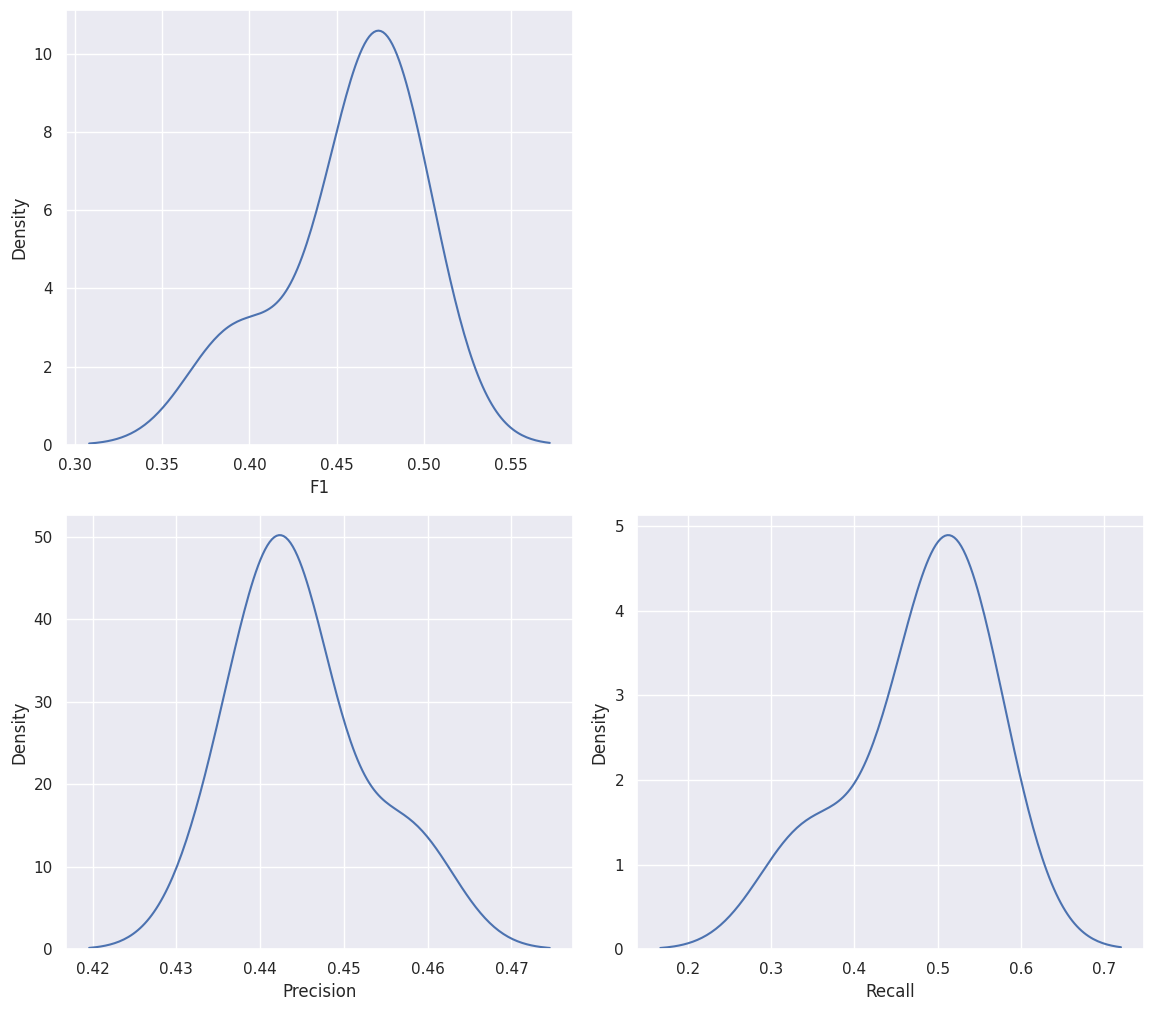

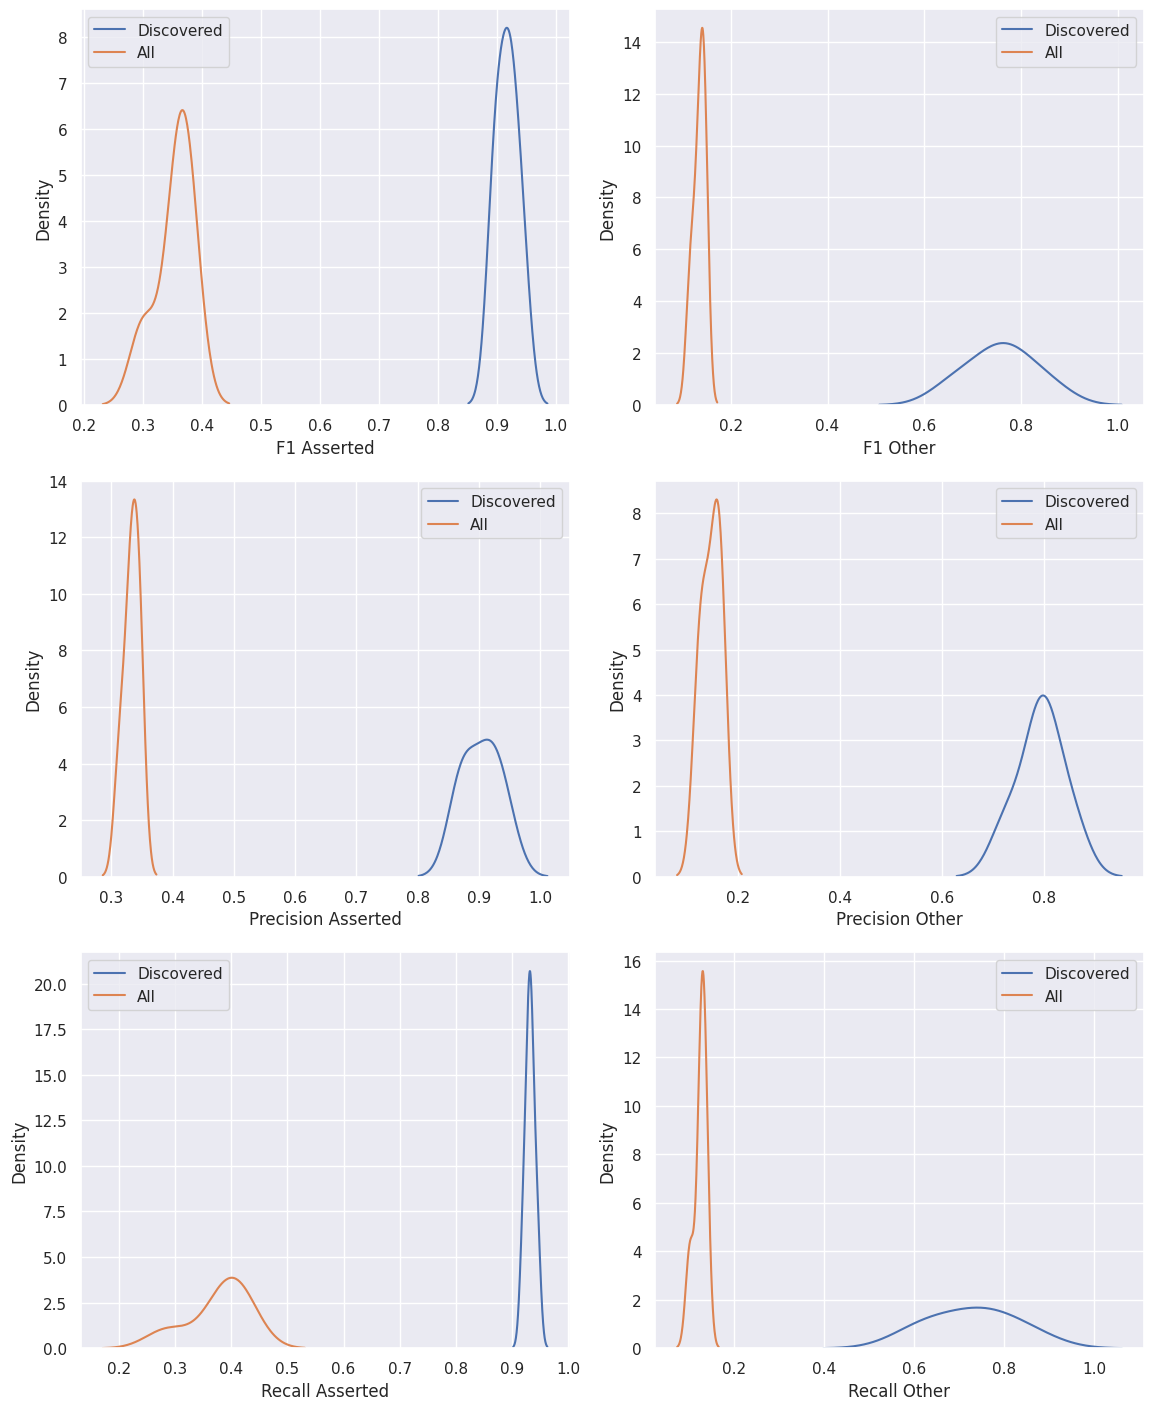

In [9]:
#create_metric_dists(text2fact, 'text2fact')
#create_metric_dists(bio_fact, 'biofact')
#create_metric_dists(pipeline, 'pipeline')
create_metric_dists(eventgraph, 'eventgraph')

In [10]:
text2fact

,Name,Created,Runtime,State,model,epochs,train/learning_rate,eval/discovered_asserted_f1,eval/discovered_asserted_precision,eval/discovered_asserted_recall,...,Discovered Macro Avg R,Discovered Weighted Avg F1,Discovered Weighted Avg P,Discovered Weighted Avg R,All Macro Avg F1,All Macro Avg P,All Macro Avg R,All Weighted Avg F1,All Weighted Avg P,All Weighted Avg R
0,text2factuality-exp-alt,2025-04-07T02:12:53.000Z,6149,failed,google/flan-t5-large,15,0.00005,0.887356,0.869369,0.906103,...,0.778353,0.831058,0.829955,0.833986,0.550160,0.676625,0.463925,0.586142,0.712865,0.497984
1,text2factuality-exp-alt,2025-04-06T20:31:40.000Z,7944,finished,google/flan-t5-large,15,0.00005,0.891455,0.850220,0.936893,...,0.758570,0.828007,0.831341,0.836227,0.532438,0.684697,0.438925,0.574789,0.713559,0.483871
2,text2factuality-exp-alt,2025-04-06T12:14:24.000Z,9353,finished,google/flan-t5-large,15,0.00005,0.875622,0.862745,0.888889,...,0.767229,0.817881,0.816422,0.820210,0.514510,0.642197,0.429334,0.551147,0.692898,0.457661
3,text2factuality-exp-alt,2025-04-06T09:32:25.000Z,8014,finished,google/flan-t5-large,15,0.00005,0.886878,0.863436,0.911628,...,0.775581,0.830602,0.829511,0.834827,0.558881,0.686512,0.471709,0.594891,0.722272,0.506048
4,text2factuality-exp-alt,2025-04-05T06:11:11.000Z,6440,finished,google/flan-t5-large,15,0.00005,0.893905,0.876106,0.912442,...,0.785489,0.838263,0.837612,0.840775,0.557502,0.683234,0.470947,0.599292,0.730600,0.508065


In [10]:
pipeline_files = ['../results/pipeline/42--5e-05-reduce_lr_on_plateau.csv',
                  '../results/pipeline/45389--5e-05-reduce_lr_on_plateau.csv',
                  '../results/pipeline/123221--5e-05-reduce_lr_on_plateau.csv',
                  '../results/pipeline/3295992--5e-05-reduce_lr_on_plateau.csv',
                  '../results/pipeline/1002232344665--5e-05-reduce_lr_on_plateau.csv']
joint_files = ['../results/bio-factuality/123221--5e-05-reduce_lr_on_plateau.csv',
               '../results/bio-factuality/3295992--5e-05-reduce_lr_on_plateau.csv',
               '../results/bio-factuality/1002232344665--5e-05-reduce_lr_on_plateau.csv',
               '../results/bio-factuality/932344665--5e-05-reduce_lr_on_plateau.csv',
                '../results/bio-factuality/42--5e-05-reduce_lr_on_plateau.csv',]
text2_files = ['../results/text2factuality/9889-flan-t5-large-5e-05-reduce_lr_on_plateau.csv',
               '../results/text2factuality/4232-flan-t5-large-5e-05-reduce_lr_on_plateau.csv',
               '../results/text2factuality/412-flan-t5-large-5e-05-reduce_lr_on_plateau.csv',
               '../results/text2factuality/4231-flan-t5-large-5e-05-reduce_lr_on_plateau.csv',
               '../results/text2factuality/42-flan-t5-base-5e-05-reduce_lr_on_plateau.csv']

eventgraph_files = [f"../results/eventgraph/{i}.csv" for i in range(1, 6)]


In [12]:
def confusion_end2end(files, name):
    dfs = []
    for file in files:
        dfs.append(pd.read_csv(file, index_col=0))
    tot_df = pd.concat(dfs)
    counts = []
    for df in dfs:
        undiscovered = df[df['label'] == 'undiscovered']
        spurious = df[df['label'] == 'spurious']
        discovered = df[df['label'] == 'discovered']
        
        undisc_other = undiscovered[undiscovered['true'] == 'Other']
        undisc_asserted = undiscovered[undiscovered['true'] == 'Asserted']
        
        spurious_other = spurious[spurious['pred'] == 'Other']
        spurious_asserted = spurious[spurious['pred'] == 'Asserted']
        
        discovered_true_other = discovered[(discovered['pred'] == 'Other') & (discovered['true'] == 'Other')]
        discovered_true_asserted = discovered[(discovered['pred'] == 'Asserted') & (discovered['true'] == 'Asserted')]
        discovered_false_other = discovered[(discovered['true'] == 'Other') & (discovered['pred'] == 'Asserted')]
        discovered_false_asserted = discovered[(discovered['true'] == 'Asserted') & (discovered['pred'] == 'Other')]
        
        sample = {
            'Undiscovered_Asserted': len(undisc_asserted),
            'Undiscovered_Other': len(undisc_other),
            'Spurious_Asserted': len(spurious_asserted),
            'Spurious_Other': len(spurious_other),
            'Discovered_Asserted': len(discovered_true_asserted),
            'Discovered_Other': len(discovered_true_other),
            'Discovered misclassified_Asserted': len(discovered_false_asserted),
            'Discovered misclassified_Other': len(discovered_false_other)
        }
        counts.append(sample)
    
    counts = pd.DataFrame(counts)
    data = counts.describe().T[['mean', 'std']].to_dict()
    # Data categories
    rows = ['Asserted', 'Other']
    cols = ['Undiscovered', 'Discovered misclassified', 'Discovered',] #'spurious']
    
    # Fill the matrix with means
    matrix = [
        [data['mean'][f"{col}_Asserted"] for col in cols],
        [data['mean'][f"{col}_Other"] for col in cols]
    ]
    
    # Format annotations with ± std
    annot = [
        [f"{data['mean'][f'{col}_Asserted']:.1f}±{data['std'][f'{col}_Asserted']:.1f}" for col in cols],
        [f"{data['mean'][f'{col}_Other']:.1f}±{data['std'][f'{col}_Other']:.1f}" for col in cols]
    ]
    
    # Create DataFrame and transpose it
    df = pd.DataFrame(matrix, index=rows, columns=cols).T
    
    # Transpose annotations
    annot_t = list(map(list, zip(*annot)))  # equivalent to annot.T
    
    # Plot
    plt.figure(figsize=(4, 6))
    sns.heatmap(df, annot=annot_t, fmt='', cmap='Blues', cbar=False)
    plt.xlabel('True factuality')
    plt.ylabel('Subset')
    plt.tight_layout()
    plt.savefig("../results/figures/"+ name + "_absolute_confusion.pdf", dpi=300)
    plt.show()

    cols = ['Undiscovered', 'Discovered misclassified', 'Discovered',] # 'spurious']
    rows = ['Asserted', 'Other']
    
    # Create raw matrix
    raw_matrix = {
        'Asserted': [data['mean'][f'{col}_Asserted'] for col in cols],
        'Other': [data['mean'][f'{col}_Other'] for col in cols],
    }
    
    # Normalize row-wise
    norm_matrix = {
        row: [v / sum(raw_matrix[row]) for v in raw_matrix[row]]
        for row in rows
    }
    
    # Convert to DataFrame
    df = pd.DataFrame(norm_matrix, index=cols)
    
    # Annotate as percentages
    annot = df.applymap(lambda x: f"{x:.1%}")
    
    # Plot
    plt.figure(figsize=(4, 6))
    sns.heatmap(df, annot=annot, fmt='', cmap='Blues', cbar=False)
    plt.ylabel('Subset')
    plt.xlabel('True factuality')
    plt.tight_layout()
    plt.savefig("../results/figures/"+ name + "_relative_confusion.pdf", dpi=300)
    plt.show()

    counts = pd.DataFrame(counts)
    data = counts.describe().T[['mean', 'std']].to_dict()
    # Data categories
    rows = ['Asserted', 'Other']
    cols = ['Spurious']
    
    # Fill the matrix with means
    matrix = [
        [data['mean'][f"{col}_Asserted"] for col in cols],
        [data['mean'][f"{col}_Other"] for col in cols]
    ]
    
    # Format annotations with ± std
    annot = [
        [f"{data['mean'][f'{col}_Asserted']:.1f}±{data['std'][f'{col}_Asserted']:.1f}" for col in cols],
        [f"{data['mean'][f'{col}_Other']:.1f}±{data['std'][f'{col}_Other']:.1f}" for col in cols]
    ]
    
    # Create DataFrame and transpose it
    df = pd.DataFrame(matrix, index=rows, columns=cols).T
    
    # Transpose annotations
    annot_t = list(map(list, zip(*annot)))  # equivalent to annot.T
    
    # Plot
    plt.figure(figsize=(4, 2.5))
    sns.heatmap(df, annot=annot_t, fmt='', cmap='Blues', cbar=False)
    plt.xlabel('Predicted factuality')
    # plt.ylabel('Spurious events')
    plt.tight_layout()
    plt.savefig("../results/figures/"+ name + "_spurious_confusion.pdf", dpi=300)
    plt.show()



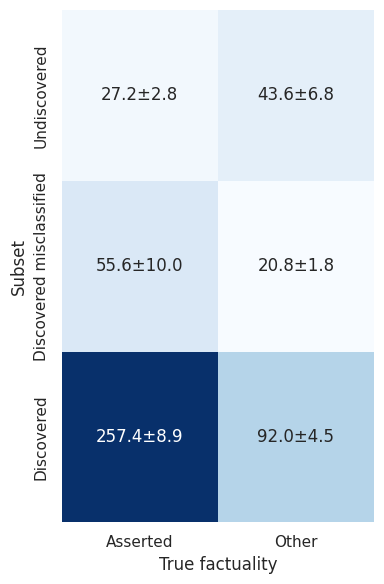

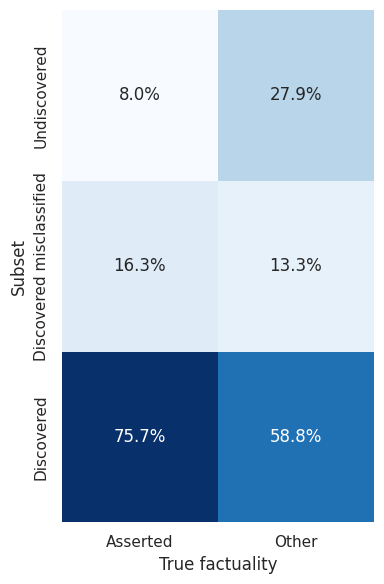

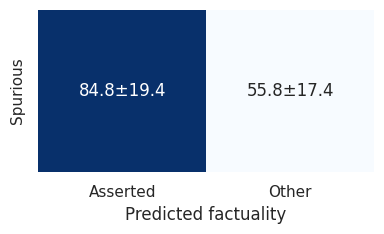

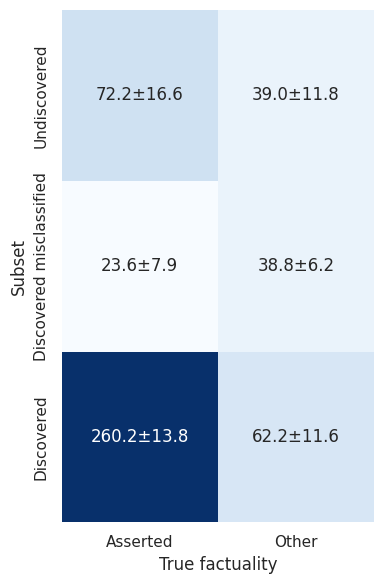

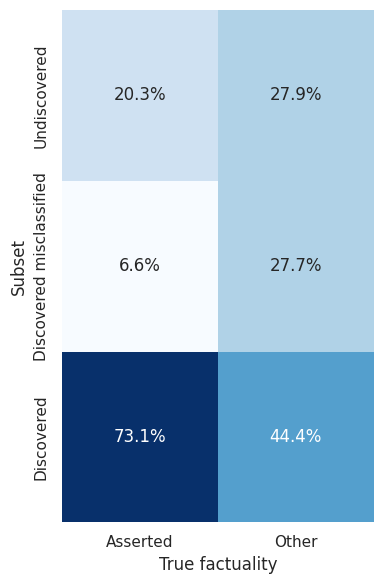

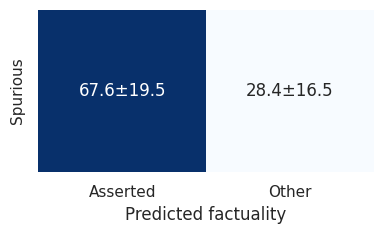

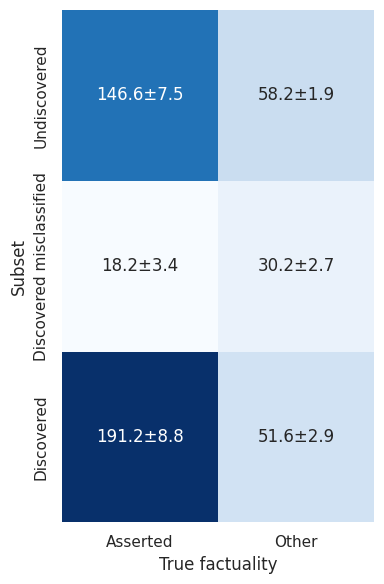

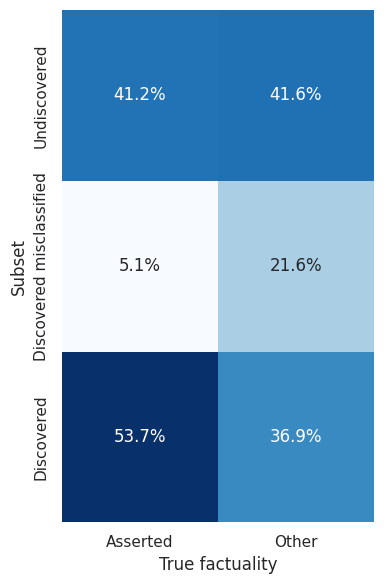

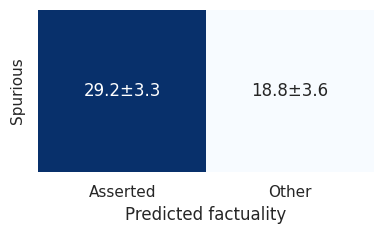

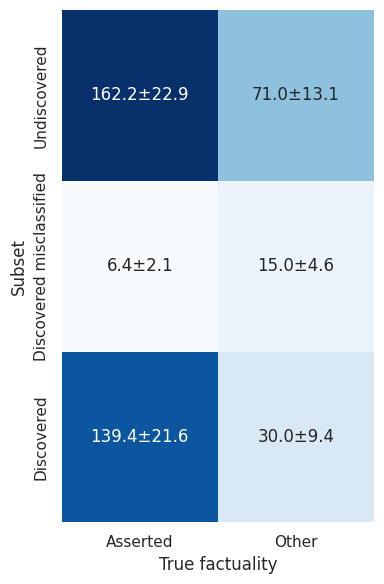

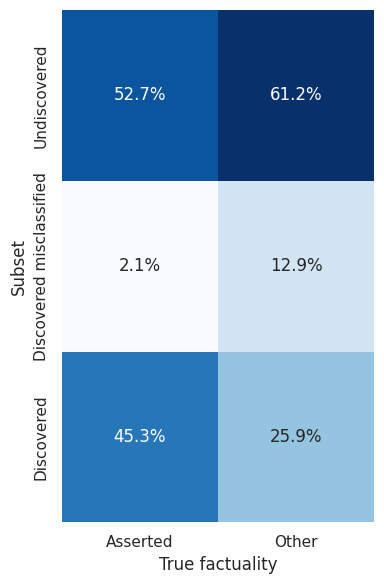

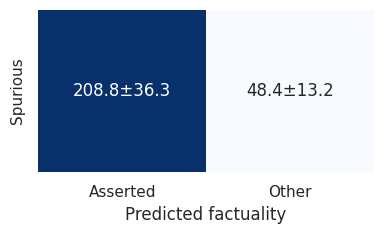

In [13]:
confusion_end2end(pipeline_files, 'pipeline')
confusion_end2end(joint_files, 'biofact')
confusion_end2end(text2_files, 'text2event')
confusion_end2end(eventgraph_files, 'eventgraph')

In [14]:
def genericity_confusion_end2end(files, name):
    dfs = []
    for file in files:
        dfs.append(pd.read_csv(file, index_col=0))
    tot_df = pd.concat(dfs)
    counts = []
    for df in dfs:
        undiscovered = df[df['label'] == 'undiscovered']
        spurious = df[df['label'] == 'spurious']
        discovered = df[df['label'] == 'discovered']
        
        undisc_other = undiscovered[undiscovered['true'] == 'Other']
        undisc_asserted = undiscovered[undiscovered['true'] == 'Asserted']
        
        discovered_true_other = discovered[(discovered['pred'] == 'Other') & (discovered['true'] == 'Other')]
        discovered_true_asserted = discovered[(discovered['pred'] == 'Asserted') & (discovered['true'] == 'Asserted')]
        discovered_false_other = discovered[(discovered['true'] == 'Other') & (discovered['pred'] == 'Asserted')]
        discovered_false_asserted = discovered[(discovered['true'] == 'Asserted') & (discovered['pred'] == 'Other')]
        
        sample = {
            'Undiscovered_Asserted generic': len(undisc_asserted[undisc_asserted['genericity'] == 'Generic']),
            'Undiscovered_Asserted specific': len(undisc_asserted[undisc_asserted['genericity'] == 'Specific']),
            'Undiscovered_Other generic': len(undisc_other[undisc_other['genericity'] == 'Generic']),
            'Undiscovered_Other specific': len(undisc_other[undisc_other['genericity'] == 'Specific']),
            'Discovered_Asserted generic': len(discovered_true_asserted[discovered_true_asserted['genericity'] == 'Generic']),
            'Discovered_Asserted specific': len(discovered_true_asserted[discovered_true_asserted['genericity'] == 'Specific']),
            'Discovered_Other generic': len(discovered_true_other[discovered_true_other['genericity'] == 'Generic']),
            'Discovered_Other specific': len(discovered_true_other[discovered_true_other['genericity'] == 'Specific']),
            'Discovered misclassified_Asserted generic': len(discovered_false_asserted[discovered_false_asserted['genericity'] == 'Generic']),
            'Discovered misclassified_Asserted specific': len(discovered_false_asserted[discovered_false_asserted['genericity'] == 'Specific']),
            'Discovered misclassified_Other generic': len(discovered_false_other[discovered_false_other['genericity'] == 'Generic']),
            'Discovered misclassified_Other specific': len(discovered_false_other[discovered_false_other['genericity'] == 'Specific'])
        }
        counts.append(sample)
    
    counts = pd.DataFrame(counts)
    data = counts.describe().T[['mean', 'std']].to_dict()
    
    rows = ['Undiscovered',  'Discovered misclassified', 'Discovered']
    cols = [
        'Asserted generic', 'Asserted specific',
        'Other generic', 'Other specific'
    ]
    
    # Rebuild matrix (means only)
    matrix = []
    for row in rows:
        row_vals = []
        for col in cols:
            key = f"{row}_{col}"
            mean = data['mean'].get(key, 0)
            row_vals.append(mean)
        matrix.append(row_vals)
    
    # Create DataFrame and normalize columns
    df = pd.DataFrame(matrix, index=rows, columns=cols)
    df_normalized = df.div(df.sum(axis=0), axis=1) * 100
    
    # Format annotations
    annot = df_normalized.applymap(lambda x: f"{x:.1f}%").values
    
    # Plot
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_normalized, annot=annot, fmt='', cmap='Blues', cbar=False)
    plt.xlabel("True factuality and genericity")
    plt.ylabel("Subset")
    plt.tight_layout()
    plt.savefig("../results/figures/"+ name + "_relative_generic_confusion.pdf", dpi=300)
    plt.show()

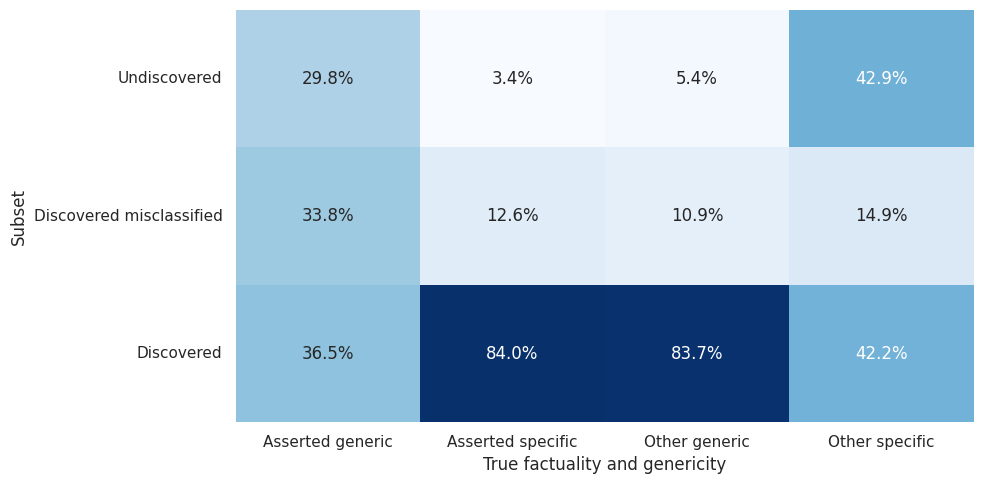

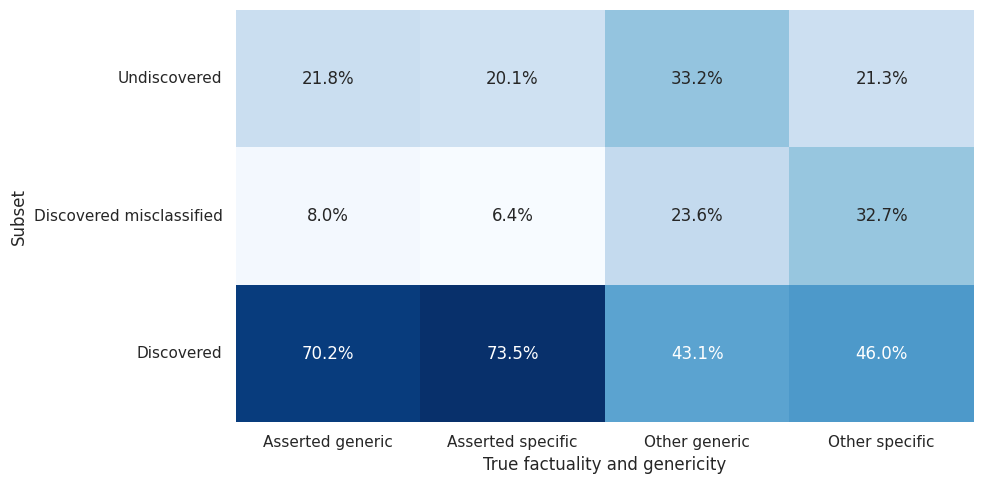

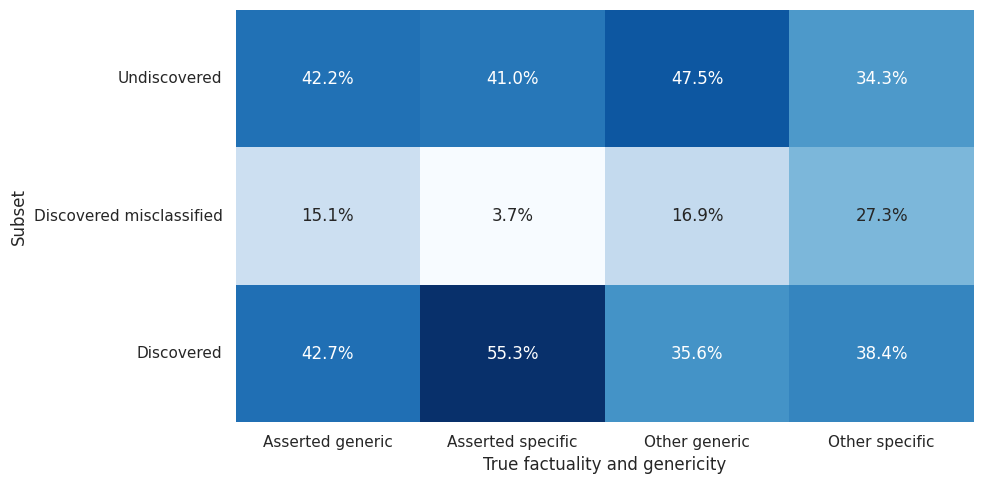

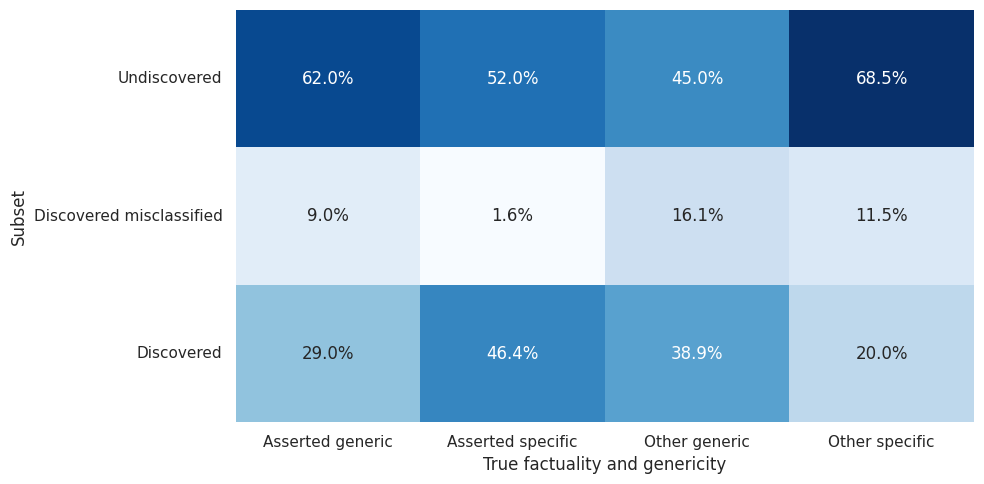

In [15]:
genericity_confusion_end2end(pipeline_files, 'pipeline')
genericity_confusion_end2end(joint_files, 'biofact')
genericity_confusion_end2end(text2_files, 'text2event')
genericity_confusion_end2end(eventgraph_files, 'eventgraph')

In [16]:
def polarity_confusion_end2end(files, name):
    dfs = []
    for file in files:
        dfs.append(pd.read_csv(file, index_col=0))
    tot_df = pd.concat(dfs)
    counts = []
    for df in dfs:
        undiscovered = df[df['label'] == 'undiscovered']
        spurious = df[df['label'] == 'spurious']
        discovered = df[df['label'] == 'discovered']
        
        undisc_other = undiscovered[undiscovered['true'] == 'Other']
        undisc_asserted = undiscovered[undiscovered['true'] == 'Asserted']
        
        discovered_true_other = discovered[(discovered['pred'] == 'Other') & (discovered['true'] == 'Other')]
        discovered_true_asserted = discovered[(discovered['pred'] == 'Asserted') & (discovered['true'] == 'Asserted')]
        discovered_false_other = discovered[(discovered['true'] == 'Other') & (discovered['pred'] == 'Asserted')]
        discovered_false_asserted = discovered[(discovered['true'] == 'Asserted') & (discovered['pred'] == 'Other')]
        sample = {
            'Undiscovered_Asserted positive': len(undisc_asserted[undisc_asserted['polarity'] == 'Positive']),
            'Undiscovered_Asserted negative': len(undisc_asserted[undisc_asserted['polarity'] == 'Negative']),
            'Undiscovered_Other positive': len(undisc_other[undisc_other['polarity'] == 'Positive']),
            'Undiscovered_Other negative': len(undisc_other[undisc_other['polarity'] == 'Negative']),
            'Discovered_Asserted positive': len(discovered_true_asserted[discovered_true_asserted['polarity'] == 'Positive']),
            'Discovered_Asserted negative': len(discovered_true_asserted[discovered_true_asserted['polarity'] == 'Negative']),
            'Discovered_Other positive': len(discovered_true_other[discovered_true_other['polarity'] == 'Positive']),
            'Discovered_Other negative': len(discovered_true_other[discovered_true_other['polarity'] == 'Negative']),
            'Discovered misclassified_Asserted positive': len(discovered_false_asserted[discovered_false_asserted['polarity'] == 'Positive']),
            'Discovered misclassified_Asserted negative': len(discovered_false_asserted[discovered_false_asserted['polarity'] == 'Negative']),
            'Discovered misclassified_Other positive': len(discovered_false_other[discovered_false_other['polarity'] == 'Positive']),
            'Discovered misclassified_Other negative': len(discovered_false_other[discovered_false_other['polarity'] == 'Negative'])
        }
        counts.append(sample)

    counts = pd.DataFrame(counts)
    data = counts.describe().T[['mean', 'std']].to_dict()

    rows = ['Undiscovered', 'Discovered misclassified', 'Discovered']
    cols = [
        'Asserted positive', 'Asserted negative',
        'Other positive', 'Other negative'
    ]

    # Rebuild matrix (means only)
    matrix = []
    for row in rows:
        row_vals = []
        for col in cols:
            key = f"{row}_{col}"
            mean = data['mean'].get(key, 0)
            row_vals.append(mean)
        matrix.append(row_vals)

    # Create DataFrame and normalize columns
    df = pd.DataFrame(matrix, index=rows, columns=cols)
    df_normalized = df.div(df.sum(axis=0), axis=1) * 100

    # Format annotations
    annot = df_normalized.applymap(lambda x: f"{x:.1f}%").values

    # Plot
    plt.figure(figsize=(10, 5))
    sns.heatmap(df_normalized, annot=annot, fmt='', cmap='Blues', cbar=False)
    plt.xlabel("True factuality and polarity")
    plt.ylabel("Subset")
    plt.tight_layout()
    plt.savefig(f"../results/figures/{name}_relative_polarity_confusion.pdf", dpi=300)
    plt.show()


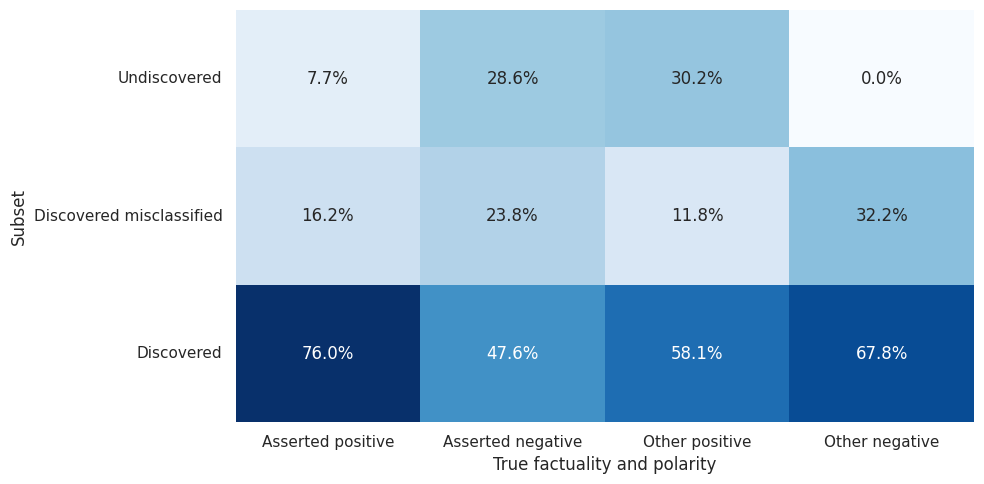

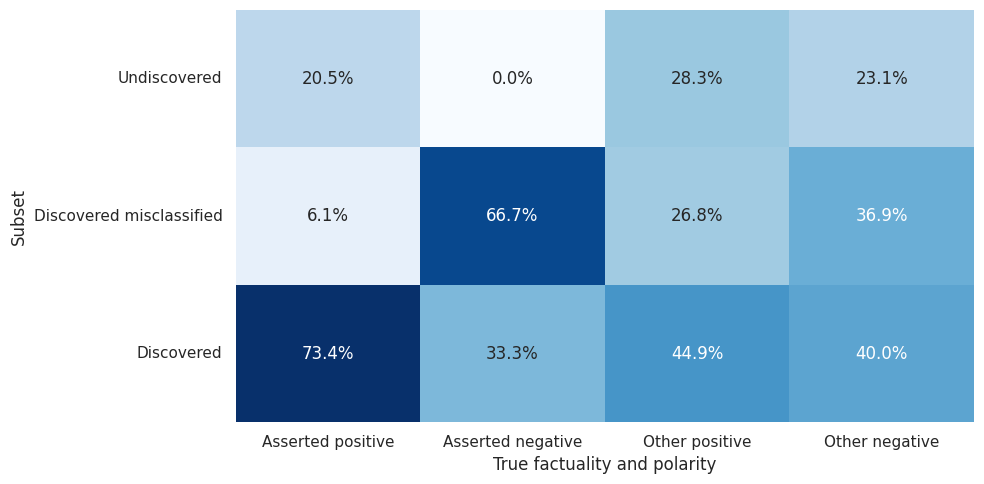

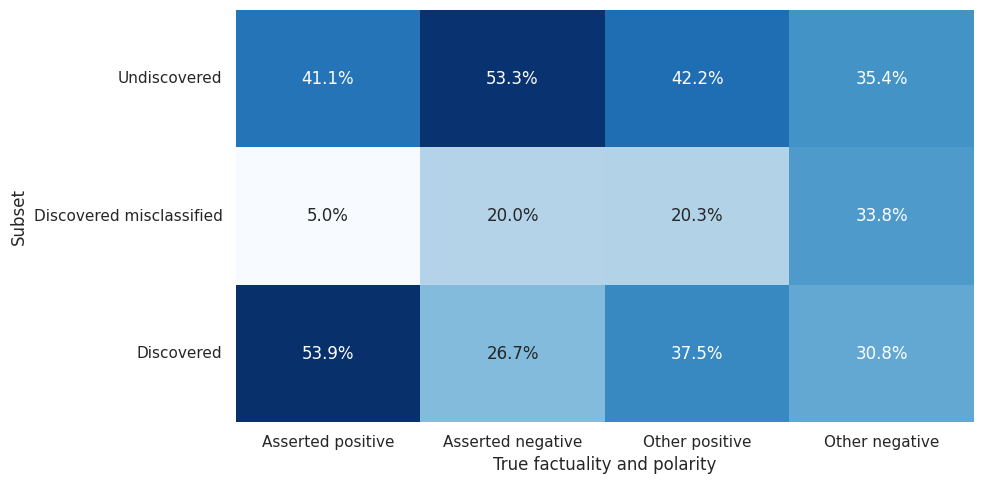

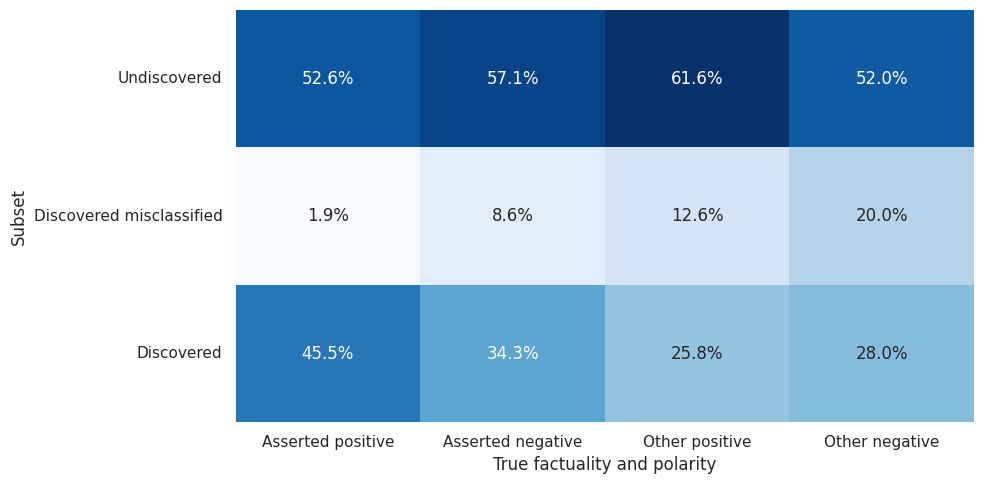

In [17]:
polarity_confusion_end2end(pipeline_files, 'pipeline')
polarity_confusion_end2end(joint_files, 'biofact')
polarity_confusion_end2end(text2_files, 'text2event')
polarity_confusion_end2end(eventgraph_files, 'eventgraph')

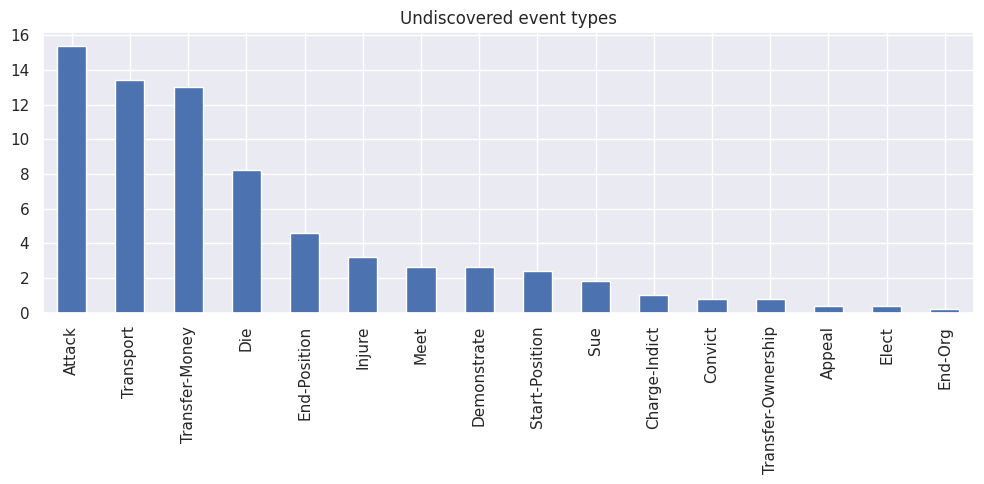

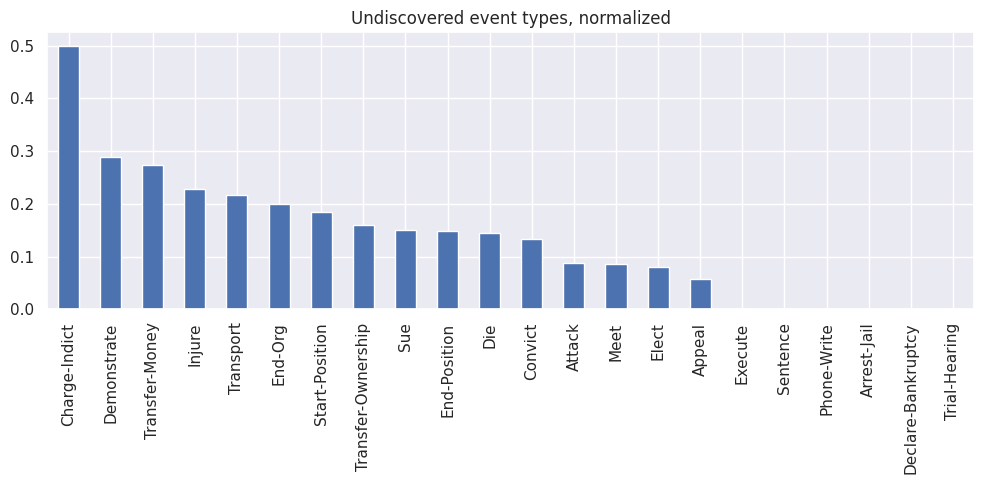

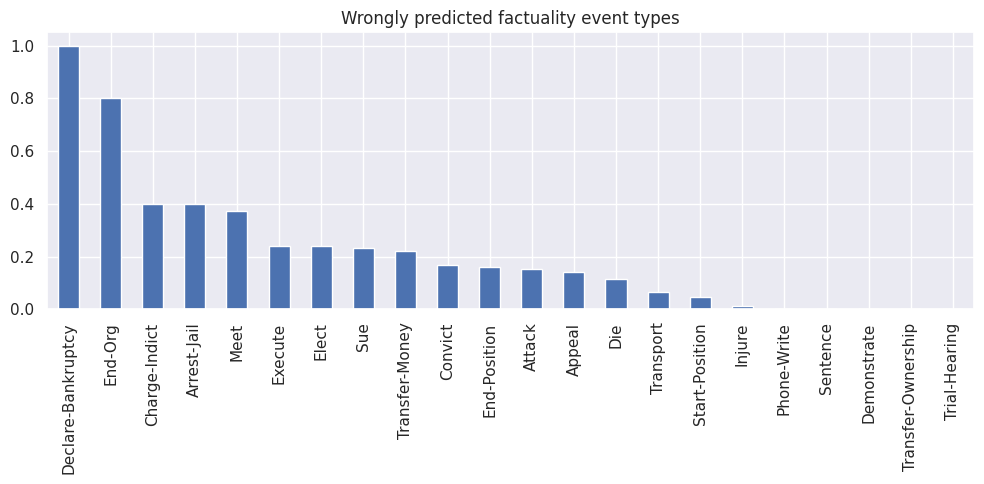

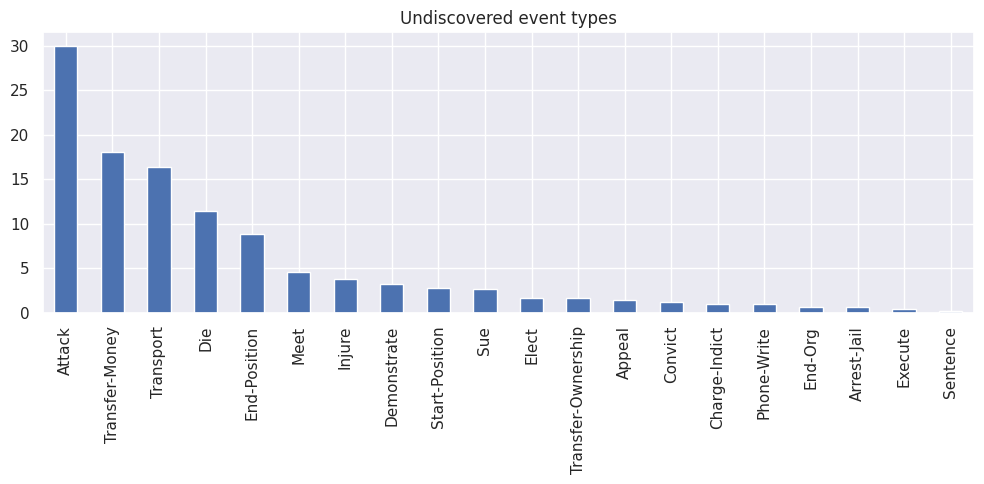

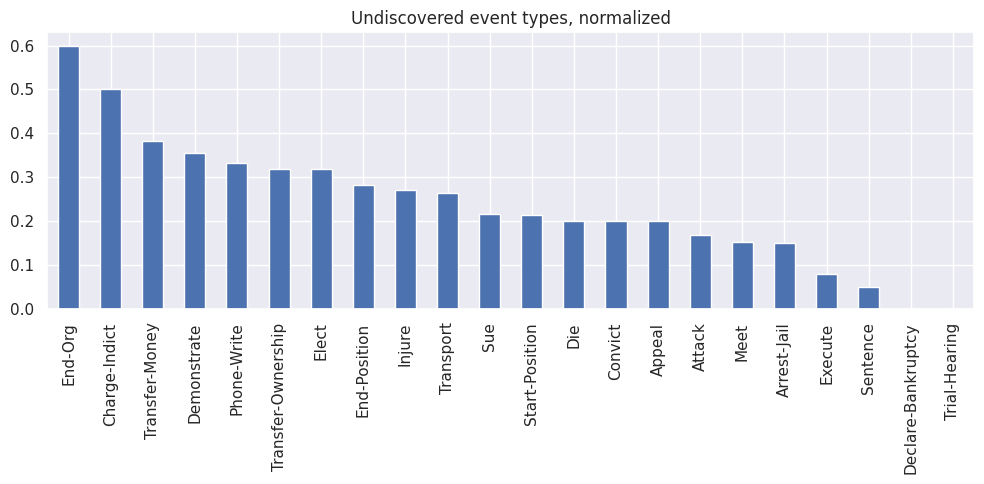

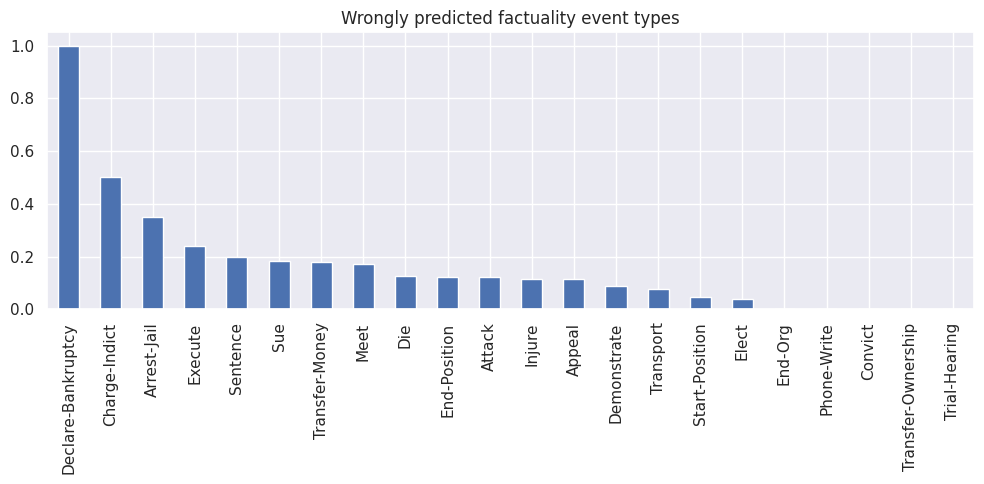

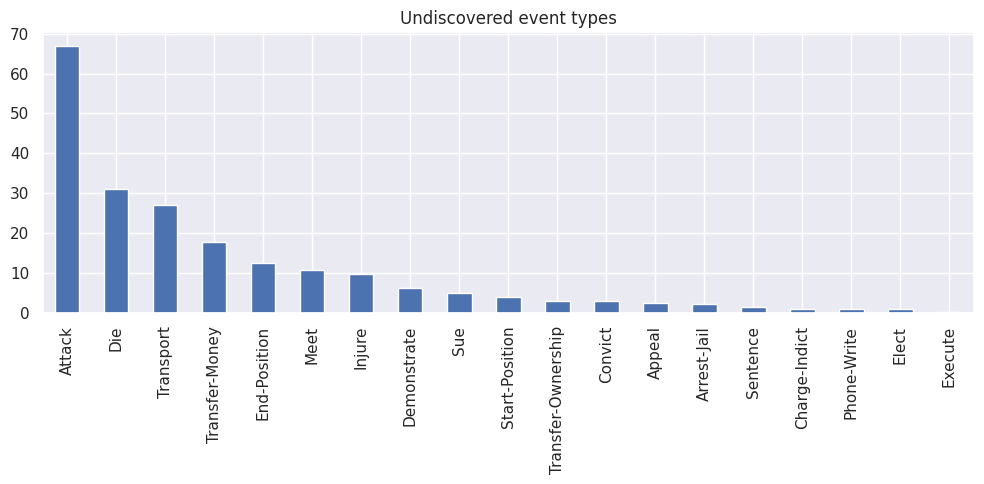

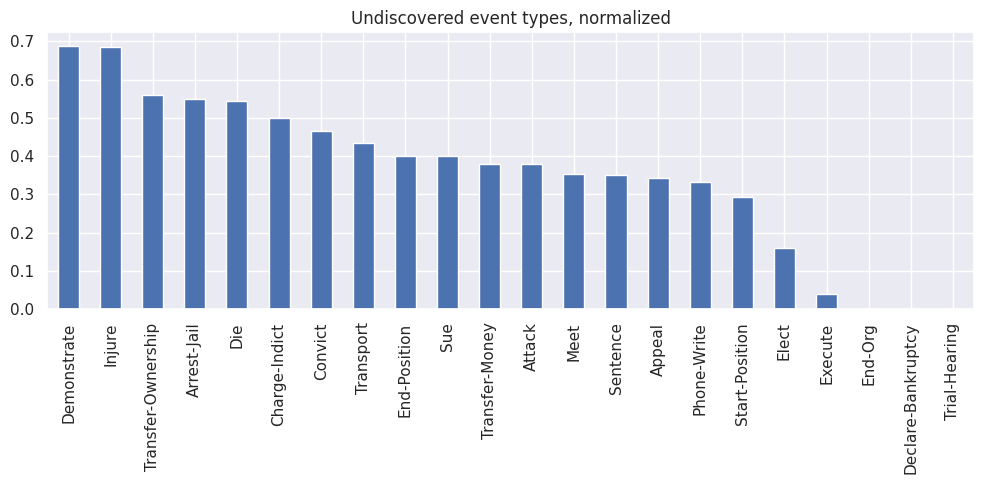

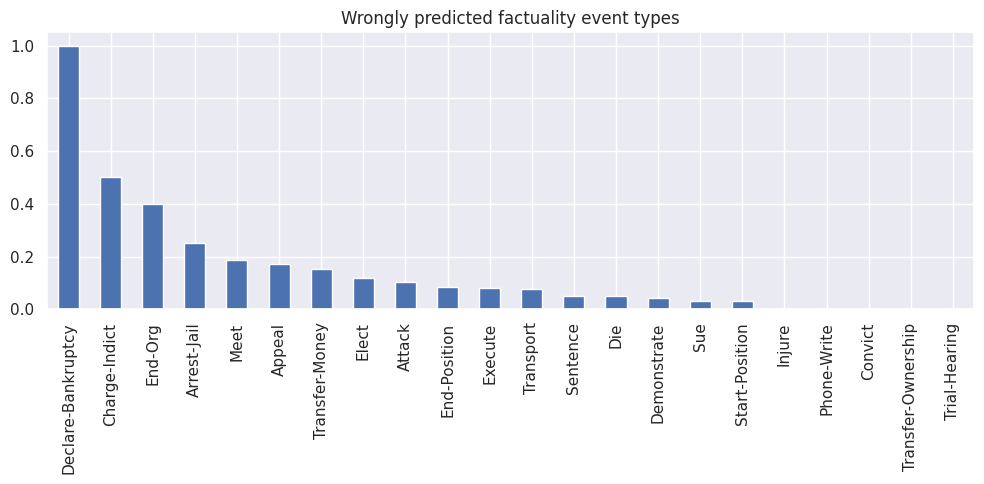

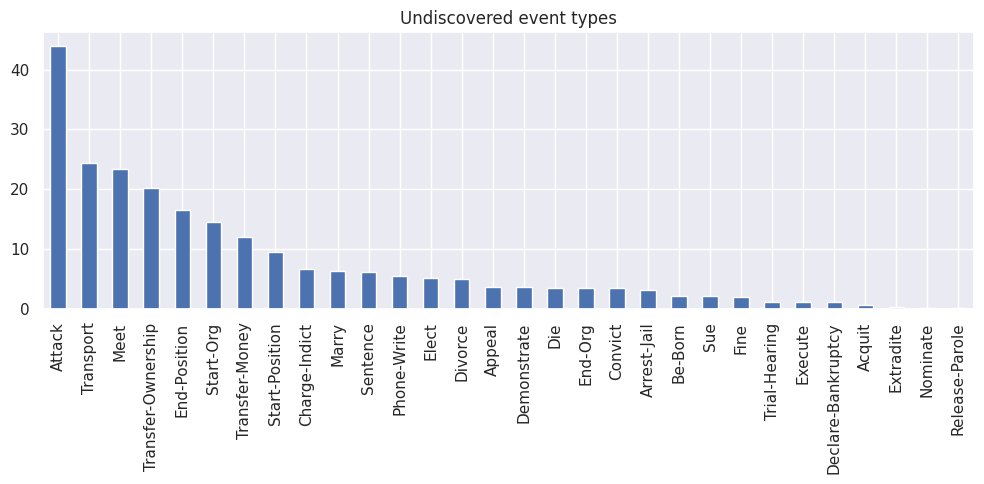

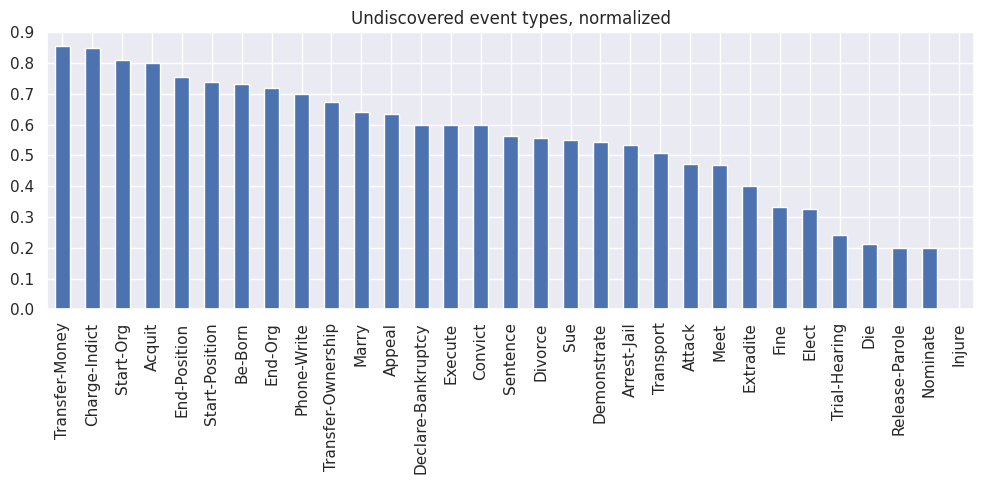

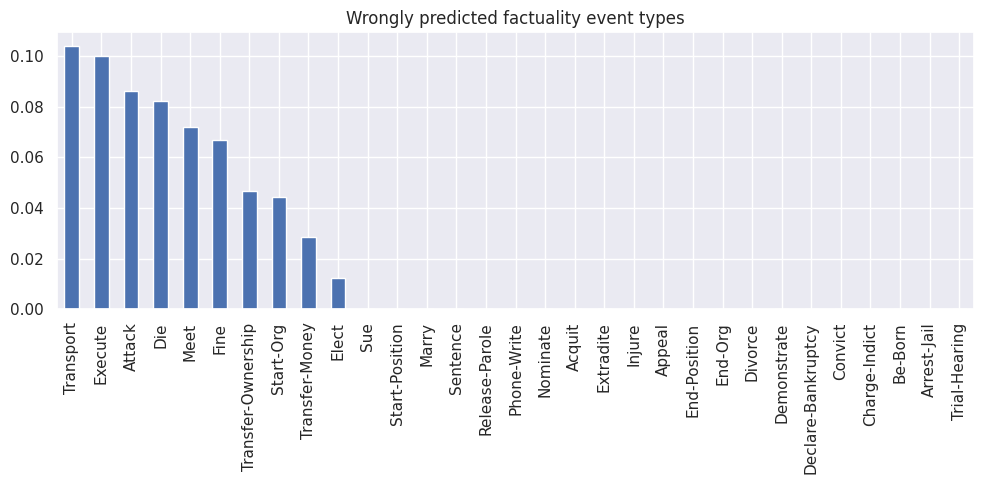

In [18]:
def type_info(files, name):
    dfs = [pd.read_csv(file, index_col=0) for file in files]
    df = pd.concat(dfs)

    undiscovered = df[df['label'] == 'undiscovered']
    disc_false = df[(df['pred'] != df['true']) & (df['label'] == 'discovered')]
    
    real = df[df['label'] != 'spurious']
    
    plt.figure(figsize=(10, 5))
    (undiscovered['type'].value_counts()/len(dfs)).fillna(0).sort_values(ascending=False).plot(kind='bar')
    plt.title("Undiscovered event types")
    plt.tight_layout()
    plt.savefig(f"../results/figures/{name}_undiscovered_event_type_absolute.pdf", dpi=300)
    plt.show()
    
    plt.figure(figsize=(10, 5))
    (undiscovered['type'].value_counts()/real['type'].value_counts()).fillna(0).sort_values(ascending=False).plot(kind='bar')
    plt.title("Undiscovered event types, normalized")
    plt.tight_layout()
    plt.savefig(f"../results/figures/{name}_undiscovered_event_type.pdf", dpi=300)
    plt.show()
    
    plt.figure(figsize=(10, 5))
    (disc_false['type'].value_counts()/real['type'].value_counts()).fillna(0).sort_values(ascending=False).plot(kind='bar')
    plt.title("Wrongly predicted factuality event types")
    plt.tight_layout()
    plt.savefig(f"../results/figures/{name}_wrong_event_type.pdf", dpi=300)
    plt.show()
    

type_info(pipeline_files, 'pipeline')
type_info(joint_files, 'biofact')
type_info(text2_files, 'text2event')
type_info(eventgraph_files, 'eventgraph')